<a href="https://colab.research.google.com/github/pchlenski/gda_project/blob/main/experiments/Generating_ROC_curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/pchlenski/gda_project/
!cd gda_project && git pull
!pip install fcit
!pip install pycid

from gda_project.utils.scm import *
from gda_project.utils.independence import *
from gda_project.utils.embed import *
from gda_project.utils.scm_large import *

fatal: destination path 'gda_project' already exists and is not an empty directory.
Already up to date.
     |████████████████████████████████| 53 kB 1.7 MB/s 
     |████████████████████████████████| 1.9 MB 10.5 MB/s 
  Created wheel for nashpy: filename=nashpy-0.0.21-py3-none-any.whl size=15280 sha256=24510843ba284e93aafbcca16d7f4ff4727c1bd7743f80e4aca2ff98132ea021
  Stored in directory: /root/.cache/pip/wheels/02/08/62/cf4fa931e0a317d180936b266169a57f4bb4eb801465bbe8a1
Successfully built nashpy


In [ ]:
# Colab imports
from google.colab import drive
drive.mount('/content/drive')

# Environmental variables
DD = '/content/drive/My Drive/notebooks/4995/data/' # data dir

Mounted at /content/drive


# First, test different independence tests

In [ ]:
data, truth, _ = generate_unconfounded()

In [ ]:
test_independences(data, test=linear_independence)

100%|██████████| 3/3 [00:00<00:00, 97.54it/s]

1 is independent of 0 given ()
1 is independent of 0 given (2,)
2 is independent of 0 given ()
2 is independent of 0 given (1,)
2 is independent of 1 given ()
2 is independent of 1 given (0,)


[[1, 0, ()], [1, 0, (2,)], [2, 0, ()], [2, 0, (1,)], [2, 1, ()], [2, 1, (0,)]]

In [ ]:
test_independences(data, test=boolean_independence)

100%|██████████| 3/3 [00:00<00:00, 117.26it/s]

1 is independent of 0 given ()
1 is independent of 0 given (2,)
2 is independent of 0 given ()
2 is independent of 0 given (1,)


[[1, 0, ()], [1, 0, (2,)], [2, 0, ()], [2, 0, (1,)]]

# Generate ROC curves

In [ ]:
results = pd.DataFrame(columns=[
    "dataset",
    "test",
    "trial",
    "x",
    "y",
    "z",
    "statistic",
])

for i, dataset_generator in enumerate([generate_unconfounded, generate_dependent, generate_confounded, scm_large]):
    for j, independence_test in enumerate([linear_independence, independent, boolean_independence, fcit_independence]):
        for trial in range(10):
            print(i,j,trial)

            latent, observable, _ = dataset_generator()
            trial_results = test_independences(latent, test=independence_test, return_statistics=True)

            for result in trial_results:
                x, y, z, statistic = result
                results = results.append({
                    "dataset" : i,
                    "test" : j,
                    "trial" : trial,
                    "x" : x, "y" : y, "z" : z,
                    "statistic" : statistic,
                }, ignore_index=True)
        

0 0 0


100%|██████████| 3/3 [00:00<00:00, 321.87it/s]


0 0 1


100%|██████████| 3/3 [00:00<00:00, 271.28it/s]


0 0 2


100%|██████████| 3/3 [00:00<00:00, 380.97it/s]


0 0 3


100%|██████████| 3/3 [00:00<00:00, 228.07it/s]


0 0 4


100%|██████████| 3/3 [00:00<00:00, 359.08it/s]

0 0 5



100%|██████████| 3/3 [00:00<00:00, 352.63it/s]


0 0 6


100%|██████████| 3/3 [00:00<00:00, 259.41it/s]


0 0 7


100%|██████████| 3/3 [00:00<00:00, 245.77it/s]


0 0 8


100%|██████████| 3/3 [00:00<00:00, 302.58it/s]


0 0 9


100%|██████████| 3/3 [00:00<00:00, 313.35it/s]


0 1 0


100%|██████████| 3/3 [00:00<00:00, 353.49it/s]

0 1 1



100%|██████████| 3/3 [00:00<00:00, 362.21it/s]


0 1 2


100%|██████████| 3/3 [00:00<00:00, 284.79it/s]


0 1 3


100%|██████████| 3/3 [00:00<00:00, 565.65it/s]


0 1 4


100%|██████████| 3/3 [00:00<00:00, 295.79it/s]


0 1 5


100%|██████████| 3/3 [00:00<00:00, 300.96it/s]


0 1 6


100%|██████████| 3/3 [00:00<00:00, 220.22it/s]


0 1 7


100%|██████████| 3/3 [00:00<00:00, 311.66it/s]


0 1 8


100%|██████████| 3/3 [00:00<00:00, 291.31it/s]


0 1 9


100%|██████████| 3/3 [00:00<00:00, 292.66it/s]


0 2 0


100%|██████████| 3/3 [00:00<00:00, 147.36it/s]

0 2 1



100%|██████████| 3/3 [00:00<00:00, 149.87it/s]


0 2 2


100%|██████████| 3/3 [00:00<00:00, 152.66it/s]


0 2 3


100%|██████████| 3/3 [00:00<00:00, 119.50it/s]


0 2 4


100%|██████████| 3/3 [00:00<00:00, 138.63it/s]


0 2 5


100%|██████████| 3/3 [00:00<00:00, 166.17it/s]


0 2 6


100%|██████████| 3/3 [00:00<00:00, 131.20it/s]


0 2 7


100%|██████████| 3/3 [00:00<00:00, 105.58it/s]


0 2 8


100%|██████████| 3/3 [00:00<00:00, 134.81it/s]


0 2 9


100%|██████████| 3/3 [00:00<00:00, 137.33it/s]

0 3 0



100%|██████████| 3/3 [00:22<00:00,  7.49s/it]


0 3 1


100%|██████████| 3/3 [00:22<00:00,  7.47s/it]


0 3 2


100%|██████████| 3/3 [00:23<00:00,  7.74s/it]


0 3 3


100%|██████████| 3/3 [00:23<00:00,  7.96s/it]


0 3 4


100%|██████████| 3/3 [00:22<00:00,  7.64s/it]


0 3 5


100%|██████████| 3/3 [00:23<00:00,  7.72s/it]


0 3 6


100%|██████████| 3/3 [00:22<00:00,  7.55s/it]


0 3 7


100%|██████████| 3/3 [00:22<00:00,  7.63s/it]


0 3 8


100%|██████████| 3/3 [00:22<00:00,  7.50s/it]


0 3 9


100%|██████████| 3/3 [00:22<00:00,  7.58s/it]


1 0 0


100%|██████████| 3/3 [00:00<00:00, 360.30it/s]


1 0 1


100%|██████████| 3/3 [00:00<00:00, 204.89it/s]


1 0 2


100%|██████████| 3/3 [00:00<00:00, 229.35it/s]


1 0 3


100%|██████████| 3/3 [00:00<00:00, 243.20it/s]


1 0 4


100%|██████████| 3/3 [00:00<00:00, 286.45it/s]


1 0 5


100%|██████████| 3/3 [00:00<00:00, 270.39it/s]


1 0 6


100%|██████████| 3/3 [00:00<00:00, 264.62it/s]


1 0 7


100%|██████████| 3/3 [00:00<00:00, 223.06it/s]


1 0 8


100%|██████████| 3/3 [00:00<00:00, 210.57it/s]


1 0 9


100%|██████████| 3/3 [00:00<00:00, 298.70it/s]


1 1 0


100%|██████████| 3/3 [00:00<00:00, 240.22it/s]


1 1 1


100%|██████████| 3/3 [00:00<00:00, 192.90it/s]


1 1 2


100%|██████████| 3/3 [00:00<00:00, 339.85it/s]


1 1 3


100%|██████████| 3/3 [00:00<00:00, 349.11it/s]


1 1 4


100%|██████████| 3/3 [00:00<00:00, 252.03it/s]


1 1 5


100%|██████████| 3/3 [00:00<00:00, 383.50it/s]


1 1 6


100%|██████████| 3/3 [00:00<00:00, 292.08it/s]


1 1 7


100%|██████████| 3/3 [00:00<00:00, 337.62it/s]


1 1 8


100%|██████████| 3/3 [00:00<00:00, 217.24it/s]


1 1 9


100%|██████████| 3/3 [00:00<00:00, 360.98it/s]


1 2 0


100%|██████████| 3/3 [00:00<00:00, 155.90it/s]


1 2 1


100%|██████████| 3/3 [00:00<00:00, 130.28it/s]


1 2 2


100%|██████████| 3/3 [00:00<00:00, 135.92it/s]


1 2 3


100%|██████████| 3/3 [00:00<00:00, 142.78it/s]


1 2 4


100%|██████████| 3/3 [00:00<00:00, 174.11it/s]


1 2 5


100%|██████████| 3/3 [00:00<00:00, 178.59it/s]


1 2 6


100%|██████████| 3/3 [00:00<00:00, 142.25it/s]

1 2 7



100%|██████████| 3/3 [00:00<00:00, 121.99it/s]


1 2 8


100%|██████████| 3/3 [00:00<00:00, 119.53it/s]


1 2 9


100%|██████████| 3/3 [00:00<00:00, 129.71it/s]


1 3 0


100%|██████████| 3/3 [00:22<00:00,  7.64s/it]


1 3 1


100%|██████████| 3/3 [00:22<00:00,  7.63s/it]


1 3 2


100%|██████████| 3/3 [00:22<00:00,  7.62s/it]


1 3 3


100%|██████████| 3/3 [00:22<00:00,  7.56s/it]


1 3 4


100%|██████████| 3/3 [00:22<00:00,  7.59s/it]


1 3 5


100%|██████████| 3/3 [00:22<00:00,  7.60s/it]


1 3 6


100%|██████████| 3/3 [00:22<00:00,  7.61s/it]


1 3 7


100%|██████████| 3/3 [00:23<00:00,  7.74s/it]


1 3 8


100%|██████████| 3/3 [00:22<00:00,  7.60s/it]


1 3 9


100%|██████████| 3/3 [00:23<00:00,  7.78s/it]


2 0 0


100%|██████████| 3/3 [00:00<00:00, 245.23it/s]


2 0 1


100%|██████████| 3/3 [00:00<00:00, 245.57it/s]


2 0 2


100%|██████████| 3/3 [00:00<00:00, 275.30it/s]


2 0 3


100%|██████████| 3/3 [00:00<00:00, 253.81it/s]


2 0 4


100%|██████████| 3/3 [00:00<00:00, 228.78it/s]


2 0 5


100%|██████████| 3/3 [00:00<00:00, 375.89it/s]


2 0 6


100%|██████████| 3/3 [00:00<00:00, 274.27it/s]


2 0 7


100%|██████████| 3/3 [00:00<00:00, 194.46it/s]


2 0 8


100%|██████████| 3/3 [00:00<00:00, 236.40it/s]


2 0 9


100%|██████████| 3/3 [00:00<00:00, 283.62it/s]


2 1 0


100%|██████████| 3/3 [00:00<00:00, 479.04it/s]


2 1 1


100%|██████████| 3/3 [00:00<00:00, 441.40it/s]


2 1 2


100%|██████████| 3/3 [00:00<00:00, 289.50it/s]

2 1 3



100%|██████████| 3/3 [00:00<00:00, 196.31it/s]


2 1 4


100%|██████████| 3/3 [00:00<00:00, 297.59it/s]


2 1 5


100%|██████████| 3/3 [00:00<00:00, 238.13it/s]


2 1 6


100%|██████████| 3/3 [00:00<00:00, 256.97it/s]


2 1 7


100%|██████████| 3/3 [00:00<00:00, 170.67it/s]


2 1 8


100%|██████████| 3/3 [00:00<00:00, 255.36it/s]


2 1 9


100%|██████████| 3/3 [00:00<00:00, 278.24it/s]


2 2 0


100%|██████████| 3/3 [00:00<00:00, 128.37it/s]


2 2 1


100%|██████████| 3/3 [00:00<00:00, 99.06it/s]


2 2 2


100%|██████████| 3/3 [00:00<00:00, 95.19it/s]


2 2 3


100%|██████████| 3/3 [00:00<00:00, 99.19it/s]


2 2 4


100%|██████████| 3/3 [00:00<00:00, 142.94it/s]


2 2 5


100%|██████████| 3/3 [00:00<00:00, 123.51it/s]


2 2 6


100%|██████████| 3/3 [00:00<00:00, 116.96it/s]


2 2 7


100%|██████████| 3/3 [00:00<00:00, 170.96it/s]


2 2 8


100%|██████████| 3/3 [00:00<00:00, 112.78it/s]


2 2 9


100%|██████████| 3/3 [00:00<00:00, 121.24it/s]


2 3 0


100%|██████████| 3/3 [00:23<00:00,  7.83s/it]


2 3 1


100%|██████████| 3/3 [00:23<00:00,  7.82s/it]


2 3 2


100%|██████████| 3/3 [00:23<00:00,  7.85s/it]


2 3 3


100%|██████████| 3/3 [00:23<00:00,  7.96s/it]


2 3 4


100%|██████████| 3/3 [00:23<00:00,  7.90s/it]


2 3 5


100%|██████████| 3/3 [00:23<00:00,  7.93s/it]


2 3 6


100%|██████████| 3/3 [00:23<00:00,  7.92s/it]


2 3 7


100%|██████████| 3/3 [00:24<00:00,  8.03s/it]


2 3 8


100%|██████████| 3/3 [00:24<00:00,  8.04s/it]


2 3 9


100%|██████████| 3/3 [00:24<00:00,  8.04s/it]


3 0 0


100%|██████████| 9/9 [00:05<00:00,  1.51it/s]


3 0 1


100%|██████████| 9/9 [00:05<00:00,  1.51it/s]


3 0 2


100%|██████████| 9/9 [00:05<00:00,  1.51it/s]


3 0 3


100%|██████████| 9/9 [00:06<00:00,  1.50it/s]


3 0 4


100%|██████████| 9/9 [00:06<00:00,  1.49it/s]


3 0 5


100%|██████████| 9/9 [00:05<00:00,  1.51it/s]


3 0 6


100%|██████████| 9/9 [00:05<00:00,  1.50it/s]


3 0 7


100%|██████████| 9/9 [00:06<00:00,  1.50it/s]


3 0 8


100%|██████████| 9/9 [00:06<00:00,  1.45it/s]


3 0 9


100%|██████████| 9/9 [00:06<00:00,  1.49it/s]


3 1 0


100%|██████████| 9/9 [00:06<00:00,  1.47it/s]


3 1 1


100%|██████████| 9/9 [00:06<00:00,  1.46it/s]


3 1 2


100%|██████████| 9/9 [00:06<00:00,  1.48it/s]


3 1 3


100%|██████████| 9/9 [00:06<00:00,  1.48it/s]


3 1 4


100%|██████████| 9/9 [00:06<00:00,  1.46it/s]


3 1 5


100%|██████████| 9/9 [00:06<00:00,  1.47it/s]


3 1 6


100%|██████████| 9/9 [00:06<00:00,  1.48it/s]


3 1 7


100%|██████████| 9/9 [00:06<00:00,  1.44it/s]


3 1 8


100%|██████████| 9/9 [00:06<00:00,  1.45it/s]


3 1 9


100%|██████████| 9/9 [00:06<00:00,  1.46it/s]


3 2 0


100%|██████████| 9/9 [29:33<00:00, 197.02s/it]


3 2 1


100%|██████████| 9/9 [58:08<00:00, 387.66s/it]


3 2 2


100%|██████████| 9/9 [29:34<00:00, 197.20s/it]


3 2 3


100%|██████████| 9/9 [10:00<00:00, 66.71s/it]


3 2 4


100%|██████████| 9/9 [11:03<00:00, 73.77s/it]


3 2 5


100%|██████████| 9/9 [11:33<00:00, 77.10s/it] 


3 2 6


100%|██████████| 9/9 [13:02<00:00, 86.97s/it] 


3 2 7


100%|██████████| 9/9 [20:01<00:00, 133.50s/it]


3 2 8


100%|██████████| 9/9 [58:34<00:00, 390.50s/it]


3 2 9


100%|██████████| 9/9 [52:22<00:00, 349.15s/it]


3 3 0


 22%|██▏       | 2/9 [09:01<31:34, 270.60s/it]

In [ ]:
# results.to_pickle(f"{DD}roc_results")

# Plot ROC results

Ground truth:
* If `dataset_generator = unconfounded` (0), then all independences should hold.
* If `dataset_generator = dependent` (1) or `confounded`, then the 2nd dimension and the 1st should be dependent

In [ ]:
results = pd.read_pickle(f"{DD}roc_results")
results

In [ ]:
# Get dependent:
results["independent"] = 1
idx = results[results["dataset"] > 0][results["x"] == 1][results["y"] == 0].index
results.loc[idx,"independent"] = 0
results

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,dataset,test,trial,x,y,z,statistic,independent
0,0,0,0,1,0,(),0.000072,1
1,0,0,0,1,0,"(2,)",0.000036,1
2,0,0,0,2,0,(),0.000384,1
3,0,0,0,2,0,"(1,)",0.000036,1
4,0,0,0,2,1,(),0.000036,1
...,...,...,...,...,...,...,...,...
715,2,3,9,1,0,"(2,)",0.002983,0
716,2,3,9,2,0,(),0.294687,1
717,2,3,9,2,0,"(1,)",0.616072,1
718,2,3,9,2,1,(),0.429286,1


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


([<matplotlib.axis.XTick at 0x7f3ea5f90910>,
 [Text(0, 0, 'Linear'),
  Text(0, 0, 'General'),
  Text(0, 0, 'Boolean'),
  Text(0, 0, 'FCIT')])

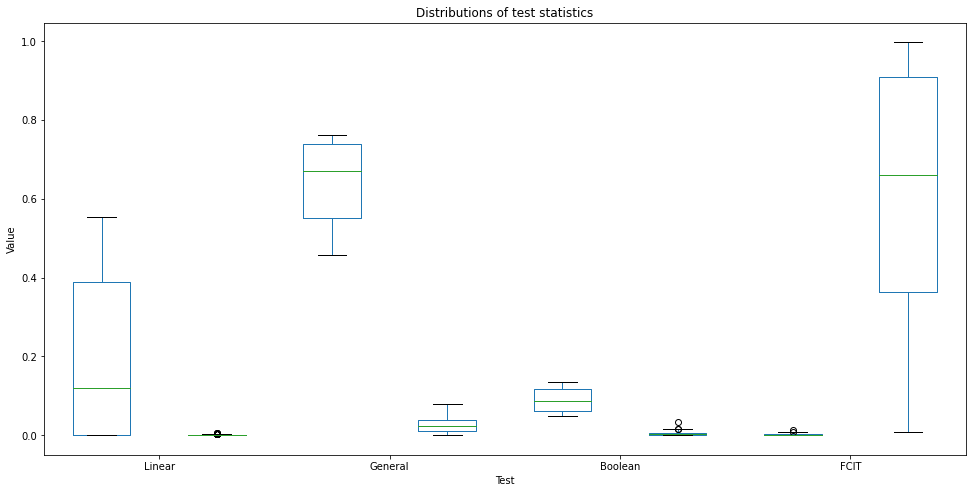

In [ ]:
# This boxplot gives us a heuristic of how different tests behave

results.boxplot(by=["test", "independent"], column="statistic", figsize=(16,8), grid=False)
plt.suptitle("")
plt.title("Distributions of test statistics")
plt.xlabel("Test")
plt.ylabel("Value")
plt.xticks([1.5, 3.5, 5.5, 7.5], ["Linear", "General", "Boolean", "FCIT"])

Notice asymmetries in the test statistic behavior:
* Tests 0 (linear independence), 1 (CI independence), and 2 (Boolean) are **lower** for independent variables.
* Test 3 (FCIT) is **higher** for independent variables, for some reason

In [ ]:
curves = []
for test in range(4):
    tps = []
    fps = []
    data = results[results["test"] == test]
    for statistic in sorted(data["statistic"]):
        if test == 3:
            p1 = np.array(data["statistic"] > statistic)
        else:
            p1 = np.array(data["statistic"] < statistic)
        p2 = np.array(data["independent"] == 1)
        tp = np.mean(p1[p2])
        fp = np.mean(p1[~p2])
        tps.append(tp)
        fps.append(fp)
    curves.append([tps, fps])

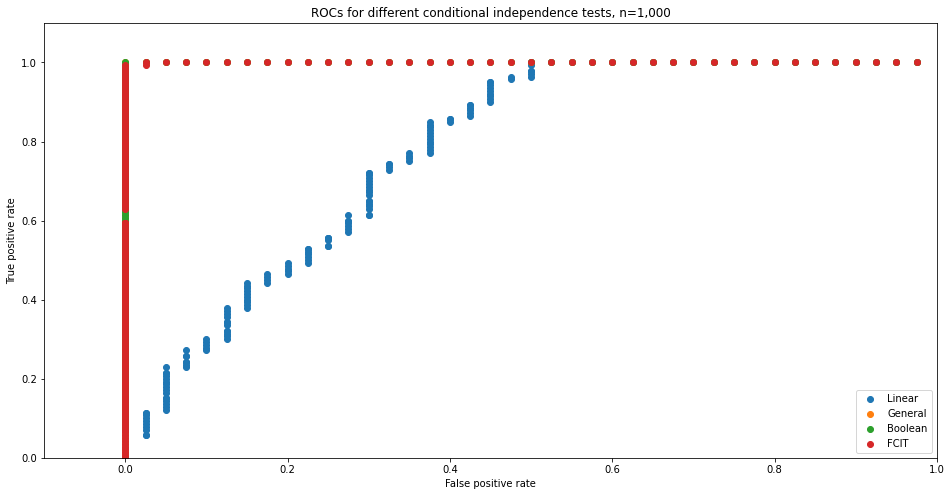

In [ ]:
titles=["Linear", "General", "Boolean", "FCIT"]

fig = plt.figure(figsize=(16,8))
for title, curve in zip(titles, curves):
    tps, fps = curve
    plt.scatter(
        fps,
        tps,
        label=title
    )

plt.title("ROCs for different conditional independence tests, n=1,000")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.xlim([-0.1,1])
plt.ylim([0.,1.1])
plt.legend()
plt.show()

# ROCs with less samples

In [ ]:
results100 = pd.DataFrame(columns=[
    "dataset",
    "test",
    "trial",
    "x",
    "y",
    "z",
    "statistic",
])

for i, dataset_generator in enumerate([generate_unconfounded, generate_dependent, generate_confounded]):
    for j, independence_test in enumerate([linear_independence, independent, boolean_independence, fcit_independence]):
        for trial in range(10):
            print(i,j,trial)

            latent, observable, _ = dataset_generator(N=100)
            trial_results = test_independences(latent, test=independence_test, return_statistics=True)

            for result in trial_results:
                x, y, z, statistic = result
                results100 = results100.append({
                    "dataset" : i,
                    "test" : j,
                    "trial" : trial,
                    "x" : x, "y" : y, "z" : z,
                    "statistic" : statistic,
                }, ignore_index=True)
        

0 0 0
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 331.09it/s]


0 0 1
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 214.81it/s]


0 0 2
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 408.77it/s]


0 0 3
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 255.11it/s]

0 0 4
precheck
check1


check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 254.14it/s]


0 0 5
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 373.06it/s]


0 0 6
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 252.70it/s]


0 0 7
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 392.75it/s]


0 0 8
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 444.88it/s]


0 0 9
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 335.16it/s]


0 1 0
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 370.62it/s]

0

 1 1
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 370.18it/s]


0 1 2
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 593.67it/s]


0 1 3
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 390.80it/s]

0 1 4
precheck


check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 292.77it/s]


0 1 5
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 393.30it/s]


0 1 6
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 289.36it/s]


0 1 7
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 448.76it/s]


0 1 8
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 534.81it/s]


0 1 9
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 401.91it/s]


0 2 0
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 572.73it/s]


0 2 1
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 561.11it/s]


0 2 2
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 584.46it/s]


0 2 3
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 849.28it/s]


0 2 4
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 367.44it/s]

0 2 5
precheck
check1


check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 884.81it/s]


0 2 6
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 881.40it/s]

0 2 7
precheck


check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 930.69it/s]


0 2 8
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 506.97it/s]

0 2 9
precheck
check1
check2
check3
check4

100%|██████████| 3/3 [00:00<00:00, 585.55it/s]

0 3 0
precheck
check1


check2
check3
check4


100%|██████████| 3/3 [00:24<00:00,  8.20s/it]


0 3 1
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:25<00:00,  8.51s/it]


0 3 2
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:24<00:00,  8.31s/it]


0 3 3
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:24<00:00,  8.24s/it]


0 3 4
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:24<00:00,  8.26s/it]


0 3 5
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:24<00:00,  8.29s/it]


0 3 6
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:24<00:00,  8.26s/it]


0 3 7
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:24<00:00,  8.32s/it]


0 3 8
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:24<00:00,  8.27s/it]


0 3 9
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:24<00:00,  8.26s/it]


1 0 0


100%|██████████| 3/3 [00:00<00:00, 333.25it/s]


1 0 1


100%|██████████| 3/3 [00:00<00:00, 324.13it/s]


1 0 2


100%|██████████| 3/3 [00:00<00:00, 349.47it/s]


1 0 3


100%|██████████| 3/3 [00:00<00:00, 169.21it/s]


1 0 4


100%|██████████| 3/3 [00:00<00:00, 390.47it/s]


1 0 5


100%|██████████| 3/3 [00:00<00:00, 219.41it/s]


1 0 6


100%|██████████| 3/3 [00:00<00:00, 314.04it/s]


1 0 7


100%|██████████| 3/3 [00:00<00:00, 345.10it/s]


1 0 8


100%|██████████| 3/3 [00:00<00:00, 393.61it/s]


1 0 9


100%|██████████| 3/3 [00:00<00:00, 371.07it/s]


1 1 0


100%|██████████| 3/3 [00:00<00:00, 422.60it/s]


1 1 1


100%|██████████| 3/3 [00:00<00:00, 543.63it/s]


1 1 2


100%|██████████| 3/3 [00:00<00:00, 428.08it/s]


1 1 3


100%|██████████| 3/3 [00:00<00:00, 223.98it/s]


1 1 4


100%|██████████| 3/3 [00:00<00:00, 318.11it/s]


1 1 5


100%|██████████| 3/3 [00:00<00:00, 566.85it/s]


1 1 6


100%|██████████| 3/3 [00:00<00:00, 598.16it/s]


1 1 7


100%|██████████| 3/3 [00:00<00:00, 523.50it/s]


1 1 8


100%|██████████| 3/3 [00:00<00:00, 598.22it/s]


1 1 9


100%|██████████| 3/3 [00:00<00:00, 368.01it/s]


1 2 0


100%|██████████| 3/3 [00:00<00:00, 757.73it/s]


1 2 1


100%|██████████| 3/3 [00:00<00:00, 619.27it/s]


1 2 2


100%|██████████| 3/3 [00:00<00:00, 542.06it/s]


1 2 3


100%|██████████| 3/3 [00:00<00:00, 422.80it/s]


1 2 4


100%|██████████| 3/3 [00:00<00:00, 486.95it/s]


1 2 5


100%|██████████| 3/3 [00:00<00:00, 890.45it/s]


1 2 6


100%|██████████| 3/3 [00:00<00:00, 511.60it/s]


1 2 7


100%|██████████| 3/3 [00:00<00:00, 695.88it/s]


1 2 8


100%|██████████| 3/3 [00:00<00:00, 545.47it/s]


1 2 9


100%|██████████| 3/3 [00:00<00:00, 608.46it/s]


1 3 0


100%|██████████| 3/3 [00:24<00:00,  8.29s/it]


1 3 1


100%|██████████| 3/3 [00:25<00:00,  8.36s/it]


1 3 2


100%|██████████| 3/3 [00:25<00:00,  8.37s/it]


1 3 3


100%|██████████| 3/3 [00:25<00:00,  8.42s/it]


1 3 4


100%|██████████| 3/3 [00:25<00:00,  8.51s/it]


1 3 5


100%|██████████| 3/3 [00:25<00:00,  8.60s/it]


1 3 6


100%|██████████| 3/3 [00:25<00:00,  8.59s/it]


1 3 7


100%|██████████| 3/3 [00:26<00:00,  8.68s/it]


1 3 8


100%|██████████| 3/3 [00:26<00:00,  8.67s/it]


1 3 9


100%|██████████| 3/3 [00:26<00:00,  8.69s/it]


2 0 0


100%|██████████| 3/3 [00:00<00:00, 294.20it/s]


2 0 1


100%|██████████| 3/3 [00:00<00:00, 273.06it/s]


2 0 2


100%|██████████| 3/3 [00:00<00:00, 347.67it/s]


2 0 3


100%|██████████| 3/3 [00:00<00:00, 354.20it/s]


2 0 4


100%|██████████| 3/3 [00:00<00:00, 509.18it/s]


2 0 5


100%|██████████| 3/3 [00:00<00:00, 496.19it/s]


2 0 6


100%|██████████| 3/3 [00:00<00:00, 210.96it/s]


2 0 7


100%|██████████| 3/3 [00:00<00:00, 348.33it/s]


2 0 8


100%|██████████| 3/3 [00:00<00:00, 193.28it/s]


2 0 9


100%|██████████| 3/3 [00:00<00:00, 148.23it/s]


2 1 0


100%|██████████| 3/3 [00:00<00:00, 464.26it/s]


2 1 1


100%|██████████| 3/3 [00:00<00:00, 253.43it/s]


2 1 2


100%|██████████| 3/3 [00:00<00:00, 311.08it/s]


2 1 3


100%|██████████| 3/3 [00:00<00:00, 458.48it/s]


2 1 4


100%|██████████| 3/3 [00:00<00:00, 446.49it/s]


2 1 5


100%|██████████| 3/3 [00:00<00:00, 183.58it/s]


2 1 6


100%|██████████| 3/3 [00:00<00:00, 495.72it/s]


2 1 7


100%|██████████| 3/3 [00:00<00:00, 377.87it/s]


2 1 8


100%|██████████| 3/3 [00:00<00:00, 523.87it/s]


2 1 9


100%|██████████| 3/3 [00:00<00:00, 347.90it/s]


2 2 0


100%|██████████| 3/3 [00:00<00:00, 359.56it/s]


2 2 1


100%|██████████| 3/3 [00:00<00:00, 563.47it/s]


2 2 2


100%|██████████| 3/3 [00:00<00:00, 628.20it/s]


2 2 3


100%|██████████| 3/3 [00:00<00:00, 519.68it/s]


2 2 4


100%|██████████| 3/3 [00:00<00:00, 653.56it/s]


2 2 5


100%|██████████| 3/3 [00:00<00:00, 455.82it/s]


2 2 6


100%|██████████| 3/3 [00:00<00:00, 768.28it/s]


2 2 7


100%|██████████| 3/3 [00:00<00:00, 571.04it/s]


2 2 8


100%|██████████| 3/3 [00:00<00:00, 594.37it/s]


2 2 9


100%|██████████| 3/3 [00:00<00:00, 560.56it/s]


2 3 0


100%|██████████| 3/3 [00:25<00:00,  8.58s/it]


2 3 1


100%|██████████| 3/3 [00:25<00:00,  8.66s/it]


2 3 2


100%|██████████| 3/3 [00:25<00:00,  8.60s/it]


2 3 3


100%|██████████| 3/3 [00:25<00:00,  8.56s/it]


2 3 4


100%|██████████| 3/3 [00:25<00:00,  8.53s/it]


2 3 5


100%|██████████| 3/3 [00:25<00:00,  8.57s/it]


2 3 6


100%|██████████| 3/3 [00:25<00:00,  8.60s/it]


2 3 7


100%|██████████| 3/3 [00:25<00:00,  8.57s/it]


2 3 8


100%|██████████| 3/3 [00:25<00:00,  8.66s/it]


2 3 9


100%|██████████| 3/3 [00:25<00:00,  8.61s/it]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


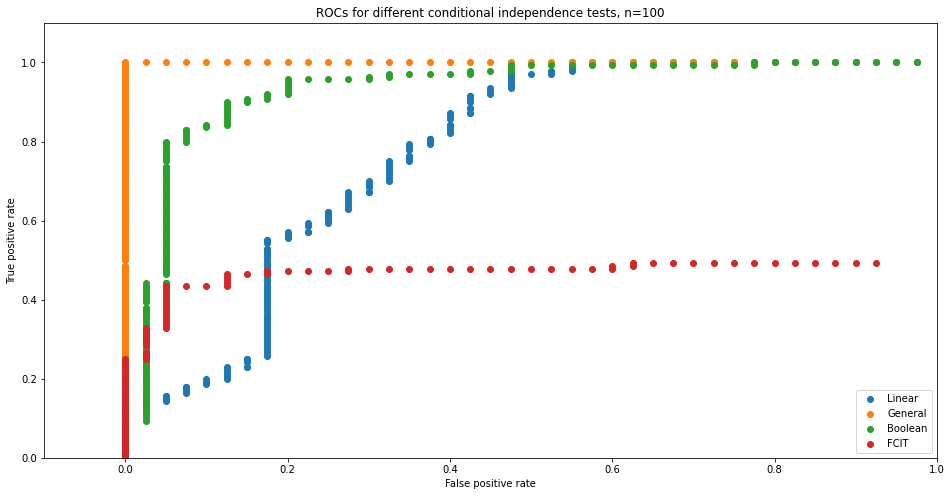

In [ ]:
# This is all a copy+paste job from above

# Get dependent:
results100["independent"] = 1
idx = results100[results100["dataset"] > 0][results100["x"] == 1][results100["y"] == 0].index
results100.loc[idx,"independent"] = 0

curves = []
for test in range(4):
    tps = []
    fps = []
    data = results100[results100["test"] == test]
    for statistic in sorted(data["statistic"]):
        if test == 3:
            p1 = np.array(data["statistic"] > statistic)
        else:
            p1 = np.array(data["statistic"] < statistic)
        p2 = np.array(data["independent"] == 1)
        tp = np.mean(p1[p2])
        fp = np.mean(p1[~p2])
        tps.append(tp)
        fps.append(fp)
    curves.append([tps, fps])

titles=["Linear", "General", "Boolean", "FCIT"]

fig = plt.figure(figsize=(16,8))
for title, curve in zip(titles, curves):
    tps, fps = curve
    plt.scatter(
        fps,
        tps,
        label=title
    )

plt.title("ROCs for different conditional independence tests, n=100")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.xlim([-0.1,1])
plt.ylim([0.,1.1])
plt.legend()
plt.show()

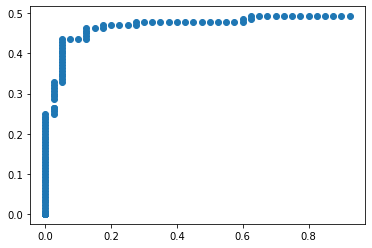

In [ ]:
plt.scatter(curves[-1][1], curves[-1][0])

# Basic independences in high-dimensional space

In [ ]:
# TODO